# Time-lapse Cameras

:::{admonition} Learning Objectives

**At the conclusion of this tutorial, you will...:**
- Know about all the time-lapse images available from the SnowEx 2017 and 2020 field campaigns 
- View example time-lapse images from SnowEx 2020 and visualize their locations
- Access snow depth measurements extracted from the SnowEx 2020 time-lapse images 
- Compare snow depths from different SnowEx 2020 time-lapse cameras 

:::

## Time-lapse Cameras on Grand Mesa during SnowEx Field Campaigns
Time-lapse cameras were installed in both the SnowEx 2017 and 2020 field campaigns on Grand Mesa in similar locations. 

**SnowEx 2017 Time-lapse Cameras** 
* 28 Total Time-lapse Cameras
* Capturing the entire winter season (September 2016-June 2017)
* Taking 4 photos/day at 8AM, 10AM, 12PM, 2PM, 4PM
* An orange pole was installed in front of 15 cameras for snow depth measurements
* Time-lapse images have been submitted to the NSIDC by Mark Raleigh with all the required metadata (e.g., locations, naming convention, etc.) for use. 

**SnowEx 2020 Time-lapse Cameras**
* 29 Total Time-lapse Cameras
* Capturing the entire winter season (September 2019-June 2020)
* Taking 3 photos/day at 11AM, 12PM, 1PM or 2 photos/day at 11AM and 12PM
* A red pole was installed in front of each camera for snow depth measurements.
* Cameras were installed on the east and west side of the Grand Mesa, across a vegetation scale of 1-9, using the convention __XMR__:
    * **X** = East (E) or West (W) areas of the Mesa
    * **M** = number 1-9, representing 1 (least vegetation) to 9 (most vegetation). Within each vegetation class, there were three sub-classes of snow depths derived from 2017 SnowEx lidar measurements. 
    * **R** = Replicate of vegetation assignment, either A, B, C, D, or E. 
        
* *The complete set of time-lapse images from 2020 are in progress for submission to the NSIDC. A subset of them are available here for you to use during hackweek.*

### An automated way of viewing and mapping time-lapse photos

**First, import all the packages we'll need for this tutorial**

In [ ]:
from snowexsql.api import PointMeasurements

measurements = PointMeasurements()

# Get the unique instrument in the table
results = measurements.all_instruments
print('\nAvailable Instruments = {}'.format(', '.join([str(r) for r in results])))

In [ ]:
# SnowEx database package for point-based data (applies for camera data)
from snowexsql.api import PointMeasurements

# Packages for data analysis 
import geopandas as gpd # geopandas library for data analysis and visualization
import pandas as pd # pandas as to read csv data and visualize tabular data
import numpy as np # numpy for data analysis 

# Packages for data visualization
import matplotlib.pyplot as plt # matplotlib.pyplot for plotting images and graphs

plt.rcParams['figure.figsize']  = (10, 4) # figure size
plt.rcParams['axes.titlesize']  = 14 # title size 
plt.rcParams['axes.labelsize']  = 12 # axes label size 
plt.rcParams['xtick.labelsize'] = 11 # x tick label size 
plt.rcParams['ytick.labelsize'] = 11 # y tick label size 
plt.rcParams['legend.fontsize'] = 11 # legend size 
mpl.rcParams['figure.dpi'] = 100

In [ ]:
# Query the database for camera-based snow depths
camera_depths = measurements.from_filter(
    type="depth",
    site_name="Grand Mesa",
    instrument="camera"
)

camera_depths.head()

#### Plot the camera locations, using snow pit locations for reference.

In [ ]:
camera_depths.explore(tooltip=['equipment','date','latitude','longitude','value','type','units'])

### Viewing the time-lapse photos
**Download the sample datasets for this tutorial** \
For ease of access during the hackweek, sample files are available for download for running the command in the cell below.

In [1]:
import earthaccess

# Authenticate with Earthdata Login servers
auth = earthaccess.login(strategy="interactive")

# Search for snow-on granules
results = earthaccess.search_data(
    doi = "10.5067/WYRNU50R9L5R"
)

In [2]:
files = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/35 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/35 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/35 [00:00<?, ?it/s]

In [ ]:
results[0].data_links()

In [ ]:
downloaded_files = earthaccess.download(
    results[0],
    local_path = "C:/Users/zfair/OneDrive - NASA/Documents/Python/Projects/SnowPit/Workflows/tmp", # Change this string to download to a different path
)

In [ ]:
## Improved way to work with camera files directly - WORK IN PROGRESS
import requests
import tarfile
from io import BytesIO
import os
from datetime import datetime
from IPython.display import Image, display

# Get the URL of the zip file from the collection metadata
camera_url = results[0].data_links()[0]

# Download the zip file
response = requests.get(camera_url)
response.raise_for_status()

# Open the zip file in memory
camera_images = []
with tarfile.open(fileobj=BytesIO(response.content), mode="r:gz") as tar:
    # List all files in the zip archive
    file_list = tar.getnames()

    print(tar.getmembers()[0])
    # Extract JPG files of choice
    for member in tar.getmembers():
        try:
            camera_file = tar.extractfile(member)
            camera_img = camera_file.read()
            creationTime = os.path.getmtime(camera_img)
            dt_c = datetime.fromtimestamp(creationTime)
            formatted_datetime = dt_c.strftime("%m/%d/%Y")
            print(formatted_datetime)
        except:
            print(f"Error: {camera_file} could not be opened.")

In [3]:
file_content = files[0].read()

12/12/2016 20:00
11/24/2016 20:00
10/02/2016 16:00
11/25/2016 14:00
10/07/2016 22:00
10/02/2016 14:00
11/16/2016 18:00
11/09/2016 20:00
02/09/2017 21:28
10/10/2016 20:00
11/23/2016 22:00
11/17/2016 18:00
12/13/2016 14:00
10/09/2016 16:00
11/06/2016 16:00
12/08/2016 22:00
11/18/2016 18:00
12/06/2016 20:00
10/05/2016 20:00
02/13/2017 14:00
10/06/2016 22:00
12/05/2016 22:00
02/12/2017 14:00
12/06/2016 16:00
12/07/2016 16:00
12/14/2016 16:00
12/09/2016 16:00
11/22/2016 16:00
10/17/2016 20:00
11/19/2016 18:00
12/10/2016 14:00
11/20/2016 14:00
12/05/2016 20:00
11/05/2016 14:00
10/25/2016 20:00
12/08/2016 16:00
11/24/2016 16:00
12/18/2016 20:01
09/28/2016 20:00
10/11/2016 18:00
11/07/2016 22:00
09/30/2016 18:00
12/07/2016 22:00
02/11/2017 18:00
12/03/2016 22:00
12/17/2016 22:00
11/29/2016 14:00
10/29/2016 18:00
12/04/2016 14:00
12/12/2016 22:00
11/22/2016 20:00
10/12/2016 18:00
11/11/2016 22:00
10/25/2016 14:00
11/12/2016 14:00
10/07/2016 16:00
10/19/2016 18:00
12/02/2016 20:00
12/15/2016 22:

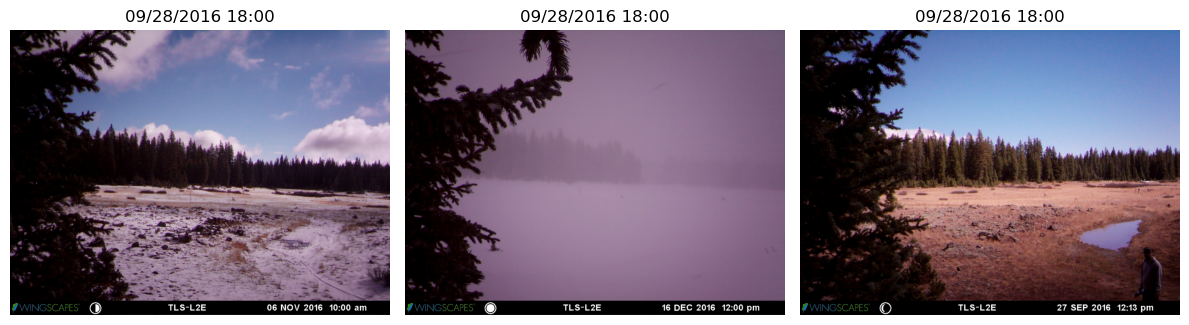

In [12]:
import tarfile
from io import BytesIO
from datetime import datetime
from PIL import Image
import matplotlib.pyplot as plt

jpg_files = []
with tarfile.open(fileobj=BytesIO(file_content), mode="r:gz") as tar:
    members = tar.getmembers()

    for member in members:
        if member.name.lower().endswith('.jpg'):
            jpg_file = tar.extractfile(member).read()
            creationTime = member.mtime
            dt_c = datetime.fromtimestamp(creationTime)
            formatted_datetime = dt_c.strftime("%m/%d/%Y %H:%M")

            desired_datetimes = ['09/27/2016 18:13',
                                 '11/06/2016 16:00',
                                 '12/16/2016 18:00']
            if formatted_datetime in desired_datetimes:
                jpg_files.append(jpg_file)

    fig, ax = plt.subplots(1,3, figsize=(12,12))
    ax = ax.flatten()
    for idx, member in enumerate(jpg_files):
        image = Image.open(BytesIO(member))
        ax[idx].imshow(image)
        ax[idx].set_title(formatted_datetime)
        ax[idx].axis('off')
        plt.tight_layout()

In [9]:
len(jpg_files)

1

In [ ]:
import tarfile

path = "/tmp"

with tarfile.open(downloaded_files[0], "r:gz") as tar:
    tar.extractall(path=path)

**Now display an example time-lapse image inside the notebook**


We will now pull time-lapse imagery for one camera, camera E9B, from the SnowEx 2020 field campaign. E9B is from the __E__ ast side of the Mesa, in a high vegetation area (__9__), and it is the second replicate of this combination (__B__). We will pull images and display a sample from various times of the winter season to provide a sense of what image and the snow poles look like.  

In [ ]:
import os
import datetime
from IPython.display import Image, display
 
files = ['C:/Users/zfair/OneDrive - NASA/Documents/Python/Projects/SnowPit/Workflows/tmp/TLS-L2E/WSCT1463.JPG',
         'C:/Users/zfair/OneDrive - NASA/Documents/Python/Projects/SnowPit/Workflows/tmp/TLS-L2E/WSCT1644.JPG',
         'C:/Users/zfair/OneDrive - NASA/Documents/Python/Projects/SnowPit/Workflows/tmp/TLS-L2E/WSCT1844.JPG']
for file in files:
    creationTime = os.path.getmtime(file)
    dt_c = datetime.datetime.fromtimestamp(creationTime)
    formatted_datetime = dt_c.strftime("%m/%d/%Y %H:%M")

    print(f'Site L2E: {formatted_datetime}')
    display(Image(file, width=300))
    print(' ')

## Time-lapse Camera Applications

Installing snow poles in front of time-lapse camera provides low-cost, long-term snow depth timeseries. Snow depths from the 2020 SnowEx time-lapse imagery have been manually processed with estimation of submission to the NSIDC database in summer 2021. 

The snow depth is the difference between the number of pixels in a snow-free image and an image with snow, with a conversion from pixels to centimeters (**Figure 1**).

![equation](./images/time-lapse-camera/timelapse-camera-tutorial_27_0.png)

**Figure 1: Equation to extract snow depth from camera images. For each image, take the difference in pixels between the length of a snow-free stake and the length of the stake and multiply by length(cm)/pixel. The ratio can be found by dividing the full length of the stake (304.8 cm) by the length of a snow-free stake in pixels.**

Snow depth can be obtained in this manner manually, but it is now easier to determine the pixel size of the stakes through machine learning. For the sake of completeness, we will provide a brief example using the camera imagery above. Otherwise, users interested in using the camera imagery with machine learning are encouraged to check out the following resources by Katherine Breen and others:

**Publication on method**  
Breen C. M., W. R. Currier, C. Vuyovich, et al. 2024. "Snow Depth Extraction From Time‐Lapse Imagery Using a Keypoint Deep Learning Model." Water Resources Research 60 (7): [10.1029/2023wr036682]

**Github page for algorithm**  
https://github.com/catherine-m-breen/snowpoles

In the example images above, we use the red pole in the fully snow-off and snow-on images for estimation.

For the snow-off image, the length of the red pole is **136 pixels**. If we assume that the pole is 304.8 cm in length, then each pixel is approximately **2.24 cm** in length.

For the snow-on image, the length of the red pole is **72 pixels**, much shorter than the snow-off length. So, there is a **~64 pixel** difference between the snow-on and snow-off lengths. Using the equation in Figure 1, we can calculate snow depth:

Depth = 2.24 * (136-72) = **143.36 cm**

*Acknowledgements: Anthony Arendt, Scott Henderson, Micah Johnson, Carrie Vuyovich, Ryan Currier, Megan Mason, Mark Raleigh*

**Additional References**\
Dickerson-Lange et al., 2017. *Snow disappearance timing is dominated by forest effects on snow accumulation in warm winter climates of the Pacific Northwest, United States.* Hydrological Processes. Vol 31, Issue 10. 13 February 2017. https://doi.org/10.1002/hyp.11144

Raleigh et al., 2013. *Approximating snow surface temperature from standard temperature and humidity data: New possibilities for snow model and remote sensing evaluation*. Water Resources Research. Vol 49, Issue 12. 07 November 2013.  https://doi.org/10.1002/2013WR013958